**Credit Risk Predictiont**

**IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

**LOAD DATASET**

In [2]:
df = pd.read_csv('/content/5k.csv')

print("Dataset Loaded Successfully")
df.head()

Dataset Loaded Successfully


,Age,Occupation,Risk Tolerance,Investment Goals,Income Level,Address,Account Balance,Deposits,Withdrawals,Transfers,International Transfers,Investments,Loan Amount,Loan Purpose,Employment Status,Loan Term (Months),Interest Rate,Loan Status,Transaction Description
0,40,Lawyer,High,Wealth Preservation,$46044.94,"7168 Moody Meadow\nHernandezshire, PW 06016",$44653.26,$9156.01,$9327.70,$3647.92,$82.80,$8729.30,$27010.93,Medical Expenses,Retired,36,11.94%,pending,"Electronics transaction of $706.18 at Sanders,..."
1,30,Teacher,Low,Wealth Preservation,$57169.50,"50001 Hector Square\nWest Luisfurt, MA 51935",$29175.47,$5933.22,$8671.60,$6729.86,$819.69,$4545.18,$31266.97,Auto Purchase,Retired,36,8.08%,approved,Transaction at Evans-Smith for $2250.03
2,37,Teacher,Low,Speculation,$71760.86,"997 James Isle\nNorth Rebeccafurt, RI 13366",$86141.59,$22583.11,$16468.58,$6032.53,$1526.33,$8251.45,$41260.58,Auto Purchase,Employed,12,13.07%,pending,Purchase at Taylor-Gutierrez for $615.85 on 20...
3,27,Student,Medium,Speculation,$-25488.15,"1607 Joshua Camp Apt. 634\nConleymouth, CT 66479",$1000.00,$299.47,$289.09,$109.83,$3.51,$195.73,$5000.00,Small Business,Retired,60,6.73%,approved,Travel transaction of $4852.39 at Jones-Russell
4,36,Engineer,Low,Income Generation,$106777.95,"96690 Campbell Common\nDwaynetown, MI 71857",$77918.97,$13853.25,$22699.32,$12189.32,$2152.51,$9725.21,$50000.00,Medical Expenses,Employed,24,10.60%,approved,"Purchase at Jensen, Porter and Webb for $562.2..."


**INITIAL DATA EXPLORATION**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      5000 non-null   int64 
 1   Occupation               5000 non-null   object
 2   Risk Tolerance           5000 non-null   object
 3   Investment Goals         5000 non-null   object
 4   Income Level             5000 non-null   object
 5   Address                  5000 non-null   object
 6   Account Balance          5000 non-null   object
 7   Deposits                 5000 non-null   object
 8   Withdrawals              5000 non-null   object
 9   Transfers                5000 non-null   object
 10  International Transfers  5000 non-null   object
 11  Investments              5000 non-null   object
 12  Loan Amount              5000 non-null   object
 13  Loan Purpose             5000 non-null   object
 14  Employment Status        5000 non-null  

In [4]:
df.describe()

,Age,Loan Term (Months)
count,5000.000000,5000.000000
mean,51.875600,36.235200
std,19.579888,17.014705
min,18.000000,12.000000
25%,35.000000,24.000000
50%,52.000000,36.000000
75%,69.000000,48.000000
max,85.000000,60.000000


*Missing values*

In [5]:
df.isnull().sum()

,0
Age,0
Occupation,0
Risk Tolerance,0
Investment Goals,0
Income Level,0
Address,0
Account Balance,0
Deposits,0
Withdrawals,0
Transfers,0


In [6]:
if 'target' in df.columns:
    sns.countplot(data=df, x='target')
    plt.title('Target Variable Distribution')
    plt.show()

**ENCODING CATEGORICAL VARIABLES**

In [7]:
cat_cols = df.select_dtypes(include='object').columns

if len(cat_cols) > 0:
    print(f"Encoding {len(cat_cols)} categorical columns...")
    le = LabelEncoder()
    for col in cat_cols:
        df[col] = le.fit_transform(df[col])
else:
    print("No categorical columns detected.")

Encoding 17 categorical columns...


**FEATURE SELECTION**

In [8]:
target_col = 'Loan Status'
X = df.drop(columns=[target_col])
y = df[target_col]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

**FEATURE SCALING**

In [10]:
num_cols = X.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

**MODEL TRAINING**

In [11]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)

**MODEL EVALUATION**

In [12]:
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob, multi_class='ovr'):.3f}")


 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       448
           1       0.54      0.48      0.51       280
           2       0.52      0.47      0.50       272

    accuracy                           0.70      1000
   macro avg       0.64      0.64      0.64      1000
weighted avg       0.68      0.70      0.69      1000

Accuracy: 0.699
ROC-AUC: 0.868


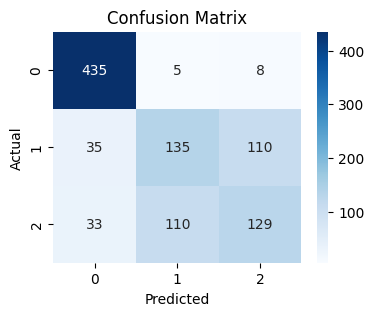

In [13]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

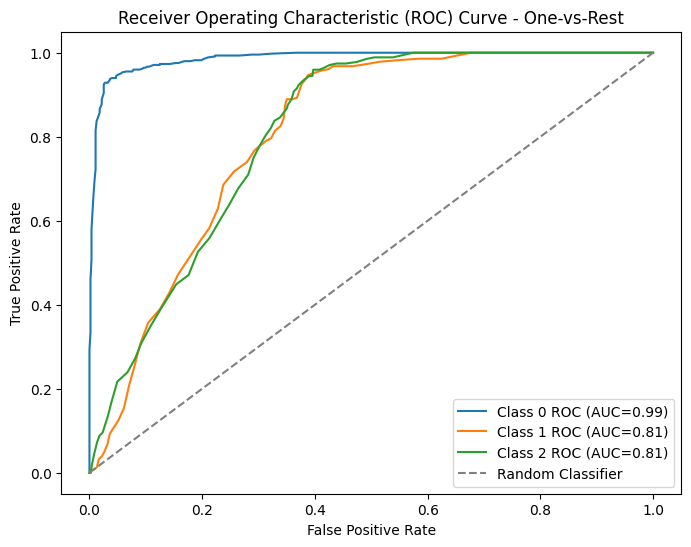

In [14]:
plt.figure(figsize=(8, 6))

# Get the number of classes
n_classes = y_prob.shape[1]

# Plot ROC curve for each class using One-vs-Rest (OvR)
for i in range(n_classes):
    y_test_binary = (y_test == i).astype(int)
    fpr, tpr, _ = roc_curve(y_test_binary, y_prob[:, i])
    roc_auc = roc_auc_score(y_test_binary, y_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} ROC (AUC={roc_auc:.2f})')

plt.plot([0, 1], [0, 1], '--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - One-vs-Rest')
plt.legend(loc='lower right')
plt.show()

**HYPERPARAMETER TUNING**

In [15]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='roc_auc',
    verbose=1
)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-validated ROC-AUC:", grid.best_score_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-validated ROC-AUC: nan


**FEATURE IMPORTANCE**

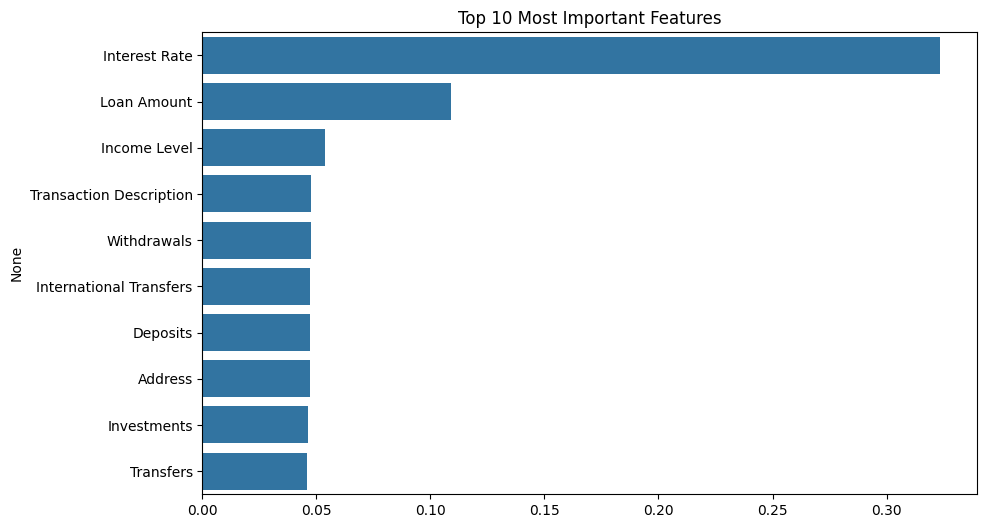

In [16]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices][:10], y=X.columns[indices][:10])
plt.title("Top 10 Most Important Features")
plt.show()

In [ ]:
!pip install gradio

In [24]:
# GRADIO INTERFACE

import gradio as gr

def gradio_predict(
    Age,
    Occupation,
    Risk_Tolerance,
    Investment_Goals,
    Income_Level,
    Address,
    Account_Balance,
    Deposits,
    Withdrawals,
    Transfers,
    International_Transfers,
    Investments,
    Loan_Amount,
    Loan_Purpose,
    Employment_Status,
    Loan_Term,
    Interest_Rate,
    Transaction_Description
):
    # Input DataFrame
    raw_data = pd.DataFrame([{
        'Age': Age,
        'Occupation': Occupation,
        'Risk Tolerance': Risk_Tolerance,
        'Investment Goals': Investment_Goals,
        'Income Level': Income_Level,
        'Address': Address,
        'Account Balance': Account_Balance,
        'Deposits': Deposits,
        'Withdrawals': Withdrawals,
        'Transfers': Transfers,
        'International Transfers': International_Transfers,
        'Investments': Investments,
        'Loan Amount': Loan_Amount,
        'Loan Purpose': Loan_Purpose,
        'Employment Status': Employment_Status,
        'Loan Term (Months)': Loan_Term,
        'Interest Rate': Interest_Rate,
        'Transaction Description': Transaction_Description
    }])

    scaled_data = raw_data.copy()
    scaled_data[num_cols] = scaler.transform(raw_data[num_cols])

    pred_class = loaded_model.predict(scaled_data)[0]
    pred_probs = loaded_model.predict_proba(scaled_data)[0]

    probs_dict = {
        f"Class {i}": float(pred_probs[i]) for i in range(len(pred_probs))
    }

    return f"{int(pred_class)}", probs_dict

inputs = [
    gr.Number(label="Age"),
    gr.Number(label="Occupation"),
    gr.Number(label="Risk Tolerance"),
    gr.Number(label="Investment Goals"),
    gr.Number(label="Income Level"),
    gr.Number(label="Address"),
    gr.Number(label="Account Balance"),
    gr.Number(label="Deposits"),
    gr.Number(label="Withdrawals"),
    gr.Number(label="Transfers"),
    gr.Number(label="International Transfers"),
    gr.Number(label="Investments"),
    gr.Number(label="Loan Amount"),
    gr.Number(label="Loan Purpose"),
    gr.Number(label="Employment Status"),
    gr.Number(label="Loan Term (Months)"),
    gr.Number(label="Interest Rate"),
    gr.Number(label="Transaction Description")
]

outputs = [
    gr.Textbox(label="Predicted Class"),
    gr.JSON(label="Class Probabilities")
]

gr.Interface(
    fn=gradio_predict,
    inputs=inputs,
    outputs=outputs,
    title="Credit Risk Prediction App",
    description="Provide financially relevant information. The model internally standardizes inputs before prediction.",
).launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://253c0d8b630b6edeb8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
